# Cluster the Olivetti Faces Dataset

In [8]:
# Import the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
# Lets look at the target of this datasets
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Lets move ahead and split the data into training, validation and test set
As the dataset is very small we will use stratifiedtraintestsplit so that all the classes have equal number of images


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_set, test_set = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_set]
y_train_valid = olivetti.target[train_valid_set]
X_test = olivetti.data[test_set]
y_test = olivetti.target[test_set]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Lets use PCA to reduce the dimensionality so that the algorithm converges faster

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

Now, lets cluster the images using K-Means, and ensure that there are several clusters

In [7]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)


k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


Now lets look at all the silhouette scores for all the clusters to select the best one.

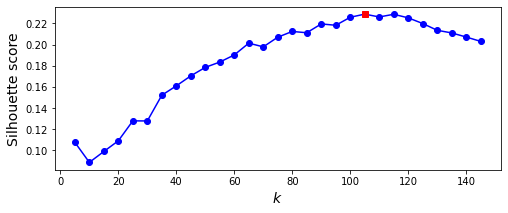

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score = [silhouette_score(X_train_pca, model.labels_)
                   for model in kmeans_per_k]
best_index = np.argmax(silhouette_score)
best_k = k_range[best_index]
best_score = silhouette_score[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_score, "bo-")
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [10]:
best_k

105

We might assume that the optimum number of clusters should be 40 as there are 40 faces,but the best number of clusters according to the score above is 105. This is because different people can look different in different images. For eg: Same people with spects and without spects

Now lets look at the inertia of the model for a comparative score

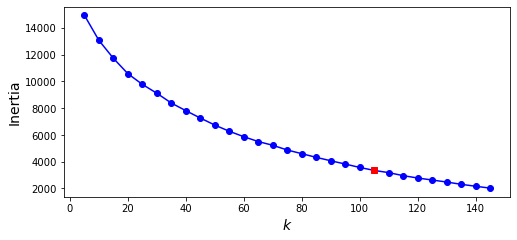

In [11]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.plot(best_k, best_inertia, 'rs')
plt.show()

In [12]:
best_model = kmeans_per_k[best_index]

Lets visualize the clusters and lets see if we have similar faces in the a cluster

Clusters 0


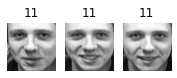

Clusters 1


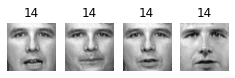

Clusters 2


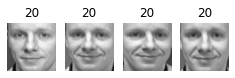

Clusters 3


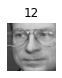

Clusters 4


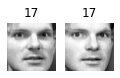

Clusters 5


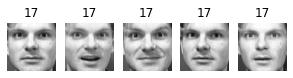

Clusters 6


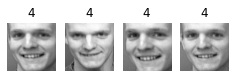

Clusters 7


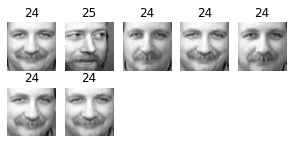

Clusters 8


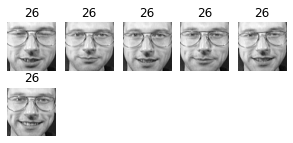

Clusters 9


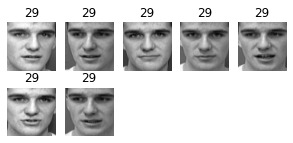

Clusters 10


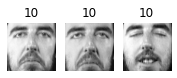

Clusters 11


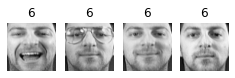

Clusters 12


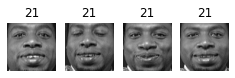

Clusters 13


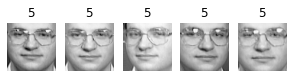

Clusters 14


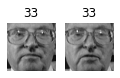

Clusters 15


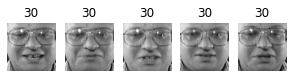

Clusters 16


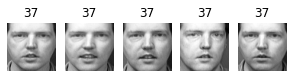

Clusters 17


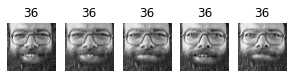

Clusters 18


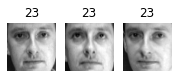

Clusters 19


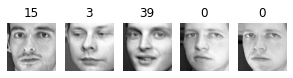

Clusters 20


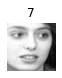

Clusters 21


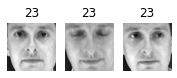

Clusters 22


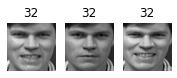

Clusters 23


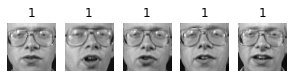

Clusters 24


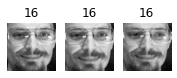

Clusters 25


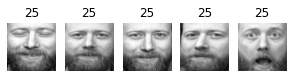

Clusters 26


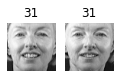

Clusters 27


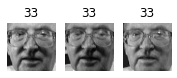

Clusters 28


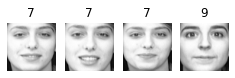

Clusters 29


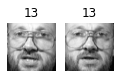

Clusters 30


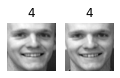

Clusters 31


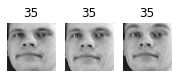

Clusters 32


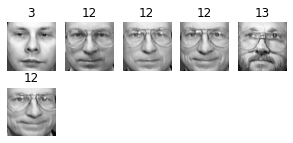

Clusters 33


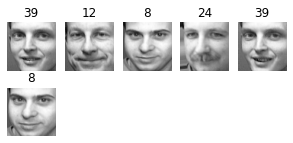

Clusters 34


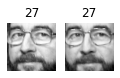

Clusters 35


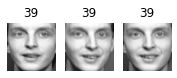

Clusters 36


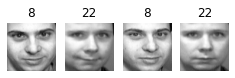

Clusters 37


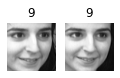

Clusters 38


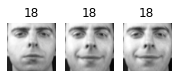

Clusters 39


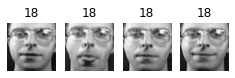

Clusters 40


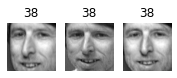

Clusters 41


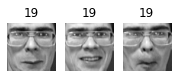

Clusters 42


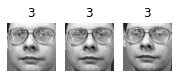

Clusters 43


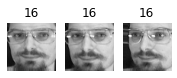

Clusters 44


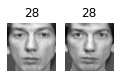

Clusters 45


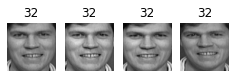

Clusters 46


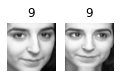

Clusters 47


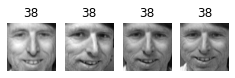

Clusters 48


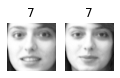

Clusters 49


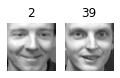

Clusters 50


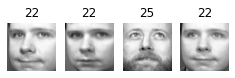

Clusters 51


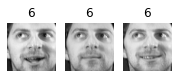

Clusters 52


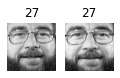

Clusters 53


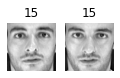

Clusters 54


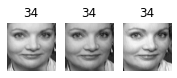

Clusters 55


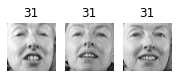

Clusters 56


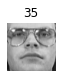

Clusters 57


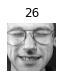

Clusters 58


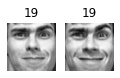

Clusters 59


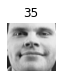

Clusters 60


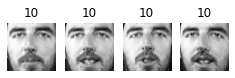

Clusters 61


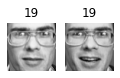

Clusters 62


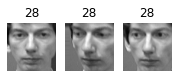

Clusters 63


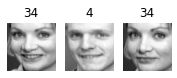

Clusters 64


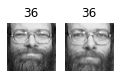

Clusters 65


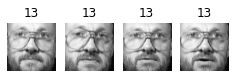

Clusters 66


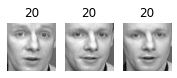

Clusters 67


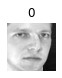

Clusters 68


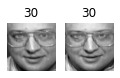

Clusters 69


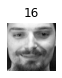

Clusters 70


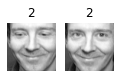

Clusters 71


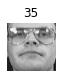

Clusters 72


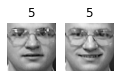

Clusters 73


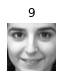

Clusters 74


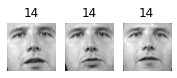

Clusters 75


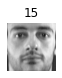

Clusters 76


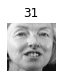

Clusters 77


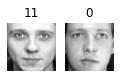

Clusters 78


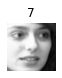

Clusters 79


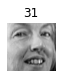

Clusters 80


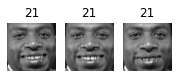

Clusters 81


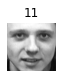

Clusters 82


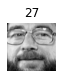

Clusters 83


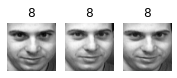

Clusters 84


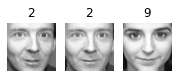

Clusters 85


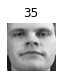

Clusters 86


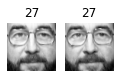

Clusters 87


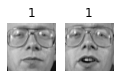

Clusters 88


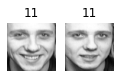

Clusters 89


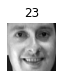

Clusters 90


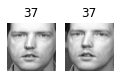

Clusters 91


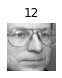

Clusters 92


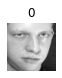

Clusters 93


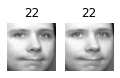

Clusters 94


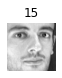

Clusters 95


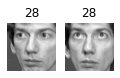

Clusters 96


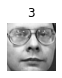

Clusters 97


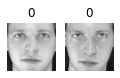

Clusters 98


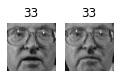

Clusters 99


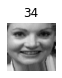

Clusters 100


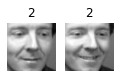

Clusters 101


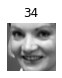

Clusters 102


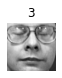

Clusters 103


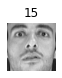

Clusters 104


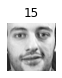

In [13]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1)// n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(face.reshape(64,64), cmap='gray')
        plt.axis('off')
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_):
    print('Clusters', cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster].reshape(-1, 64,64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster